# Exploratory Data Analysis on Dataset-Terrorism

In [410]:
import math 
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns 
import plotly.offline as py 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [452]:
# importing dataset 

dataset = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [412]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

To check each column renaming them because columns are important part

In [454]:
dataset.rename(columns={'iyear':'Year',
                       'imonth':'Month',
                       'iday':'Day',
                       'country_txt':'Country',
                       'provstate':'state', 
                        'city':'City',
                       'region_txt':'Region',
                       'attacktype1_txt':'AttackType',
                       'target1':'Target',
                       'nkill':'Killed',
                       'nwound':'Wounded',
                       'summary':'Summary',
                       'gname':'Group',
                       'targettype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type',
                        'motive':'Motive',
                       'targtype1_txt':'Target_type'},inplace=True)

Here I just pick relatable columns in whole dataset that i am going to use for further processing

In [455]:
dataset = dataset[['Year','Month','Day','Country','state','City','Region','latitude','longitude','AttackType','Killed',
                  'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [456]:
# chcking for null values in Data 

dataset.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
City              434
Region              0
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [457]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   City         181257 non-null  object 
 6   Region       181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# Destructive Features of data

In [458]:
print("Country with the most attacks:", dataset['Country'].value_counts().idxmax())

Country with the most attacks: Iraq


In [459]:
print("Country with the most attacks:", dataset['City'].value_counts().idxmax())

Country with the most attacks: Unknown


In [460]:
print("Region with most attacks:", dataset['Region'].value_counts().idxmax())

Region with most attacks: Middle East & North Africa


In [461]:
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [462]:
print("Month with the most attacks:", dataset['Month'].value_counts().idxmax())

Month with the most attacks: 5


In [463]:
print("Day with the most attacks:", dataset['Day'].value_counts().idxmax())

Day with the most attacks: 15


In [464]:
print('Data Base that contains attack details:',dataset['AttackType'].value_counts().idxmax())

Data Base that contains attack details: Bombing/Explosion


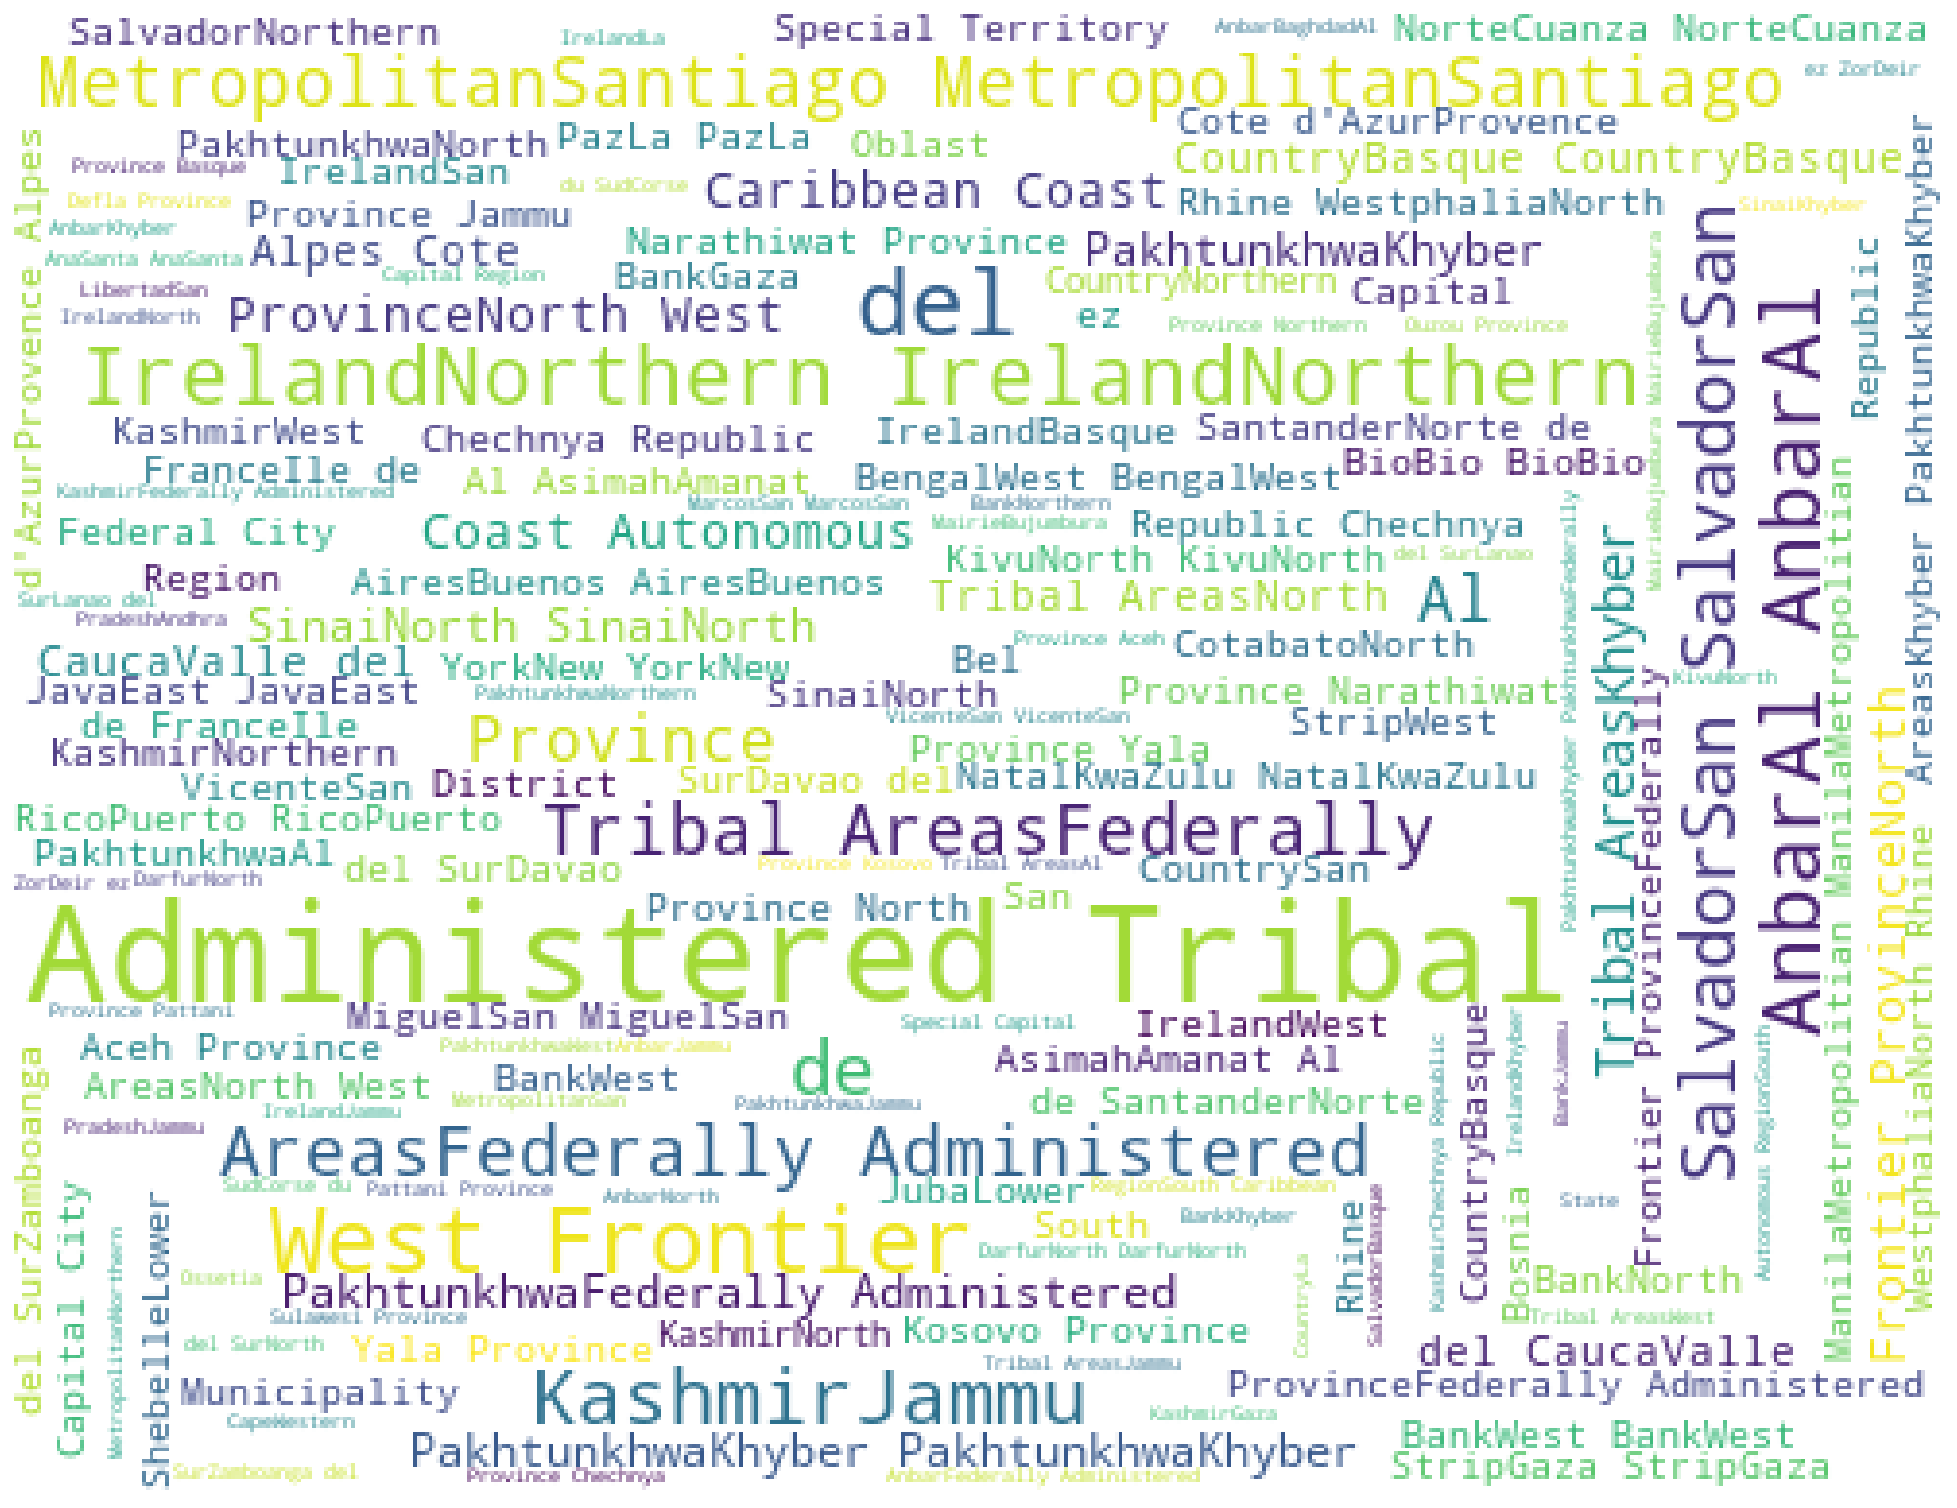

In [465]:
from wordcloud import WordCloud
from scipy import signal
cities = dataset.state.dropna(False)
# plt.subplots(figsize=(10,10))
cloud = WordCloud(background_color = 'white',
                     width = 500,
                     height = 384).generate(''.join(cities))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [466]:
dataset['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization

Number of Terrorist Activity each Year

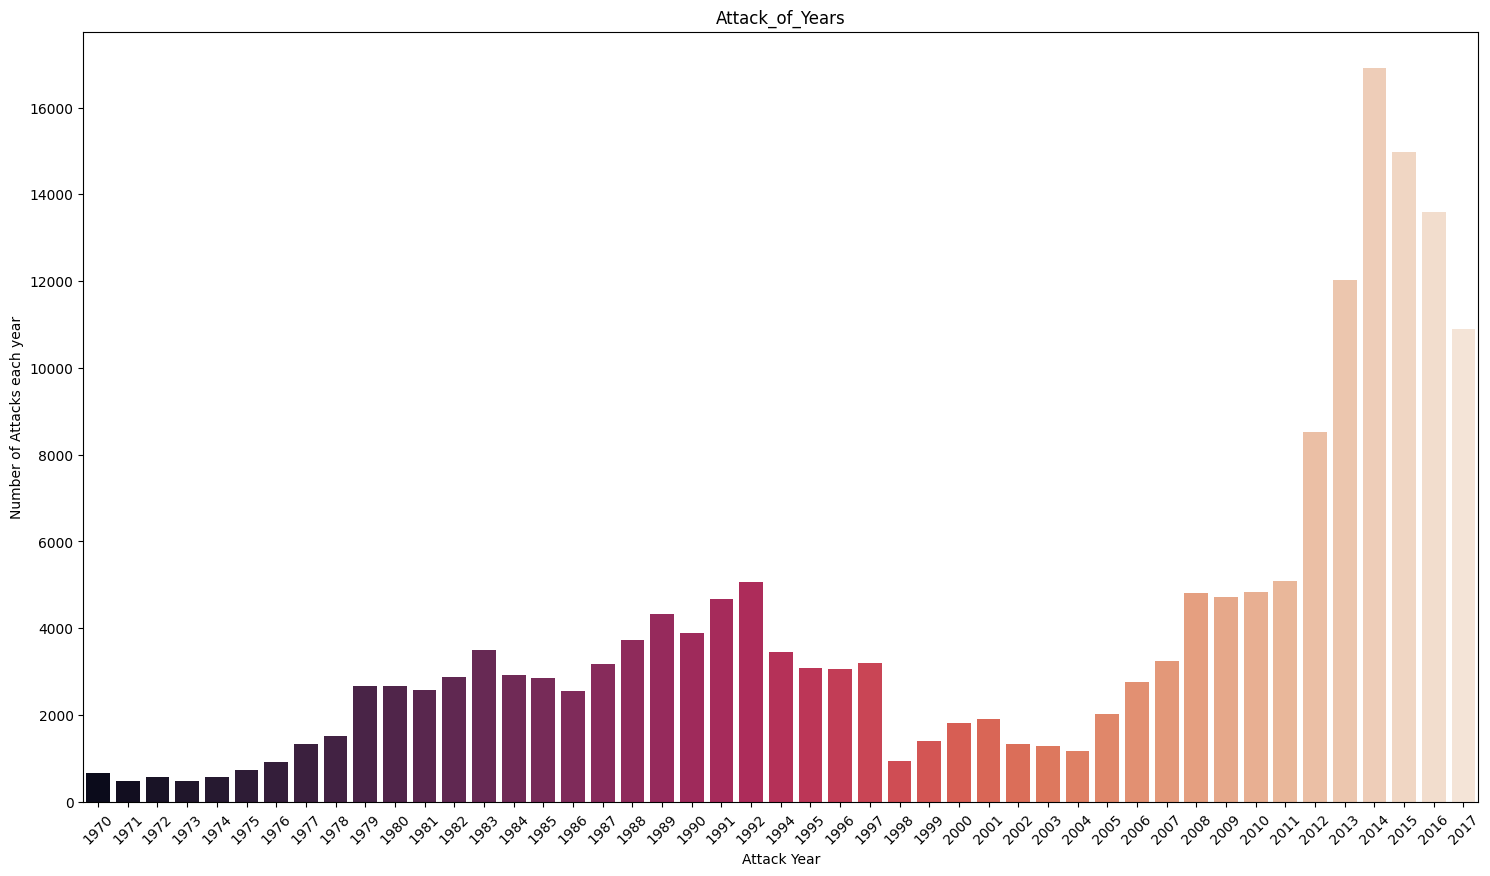

In [467]:
x_year = dataset['Year'].unique()
y_count_year = dataset['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot( x = x_year, y = y_count_year, palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

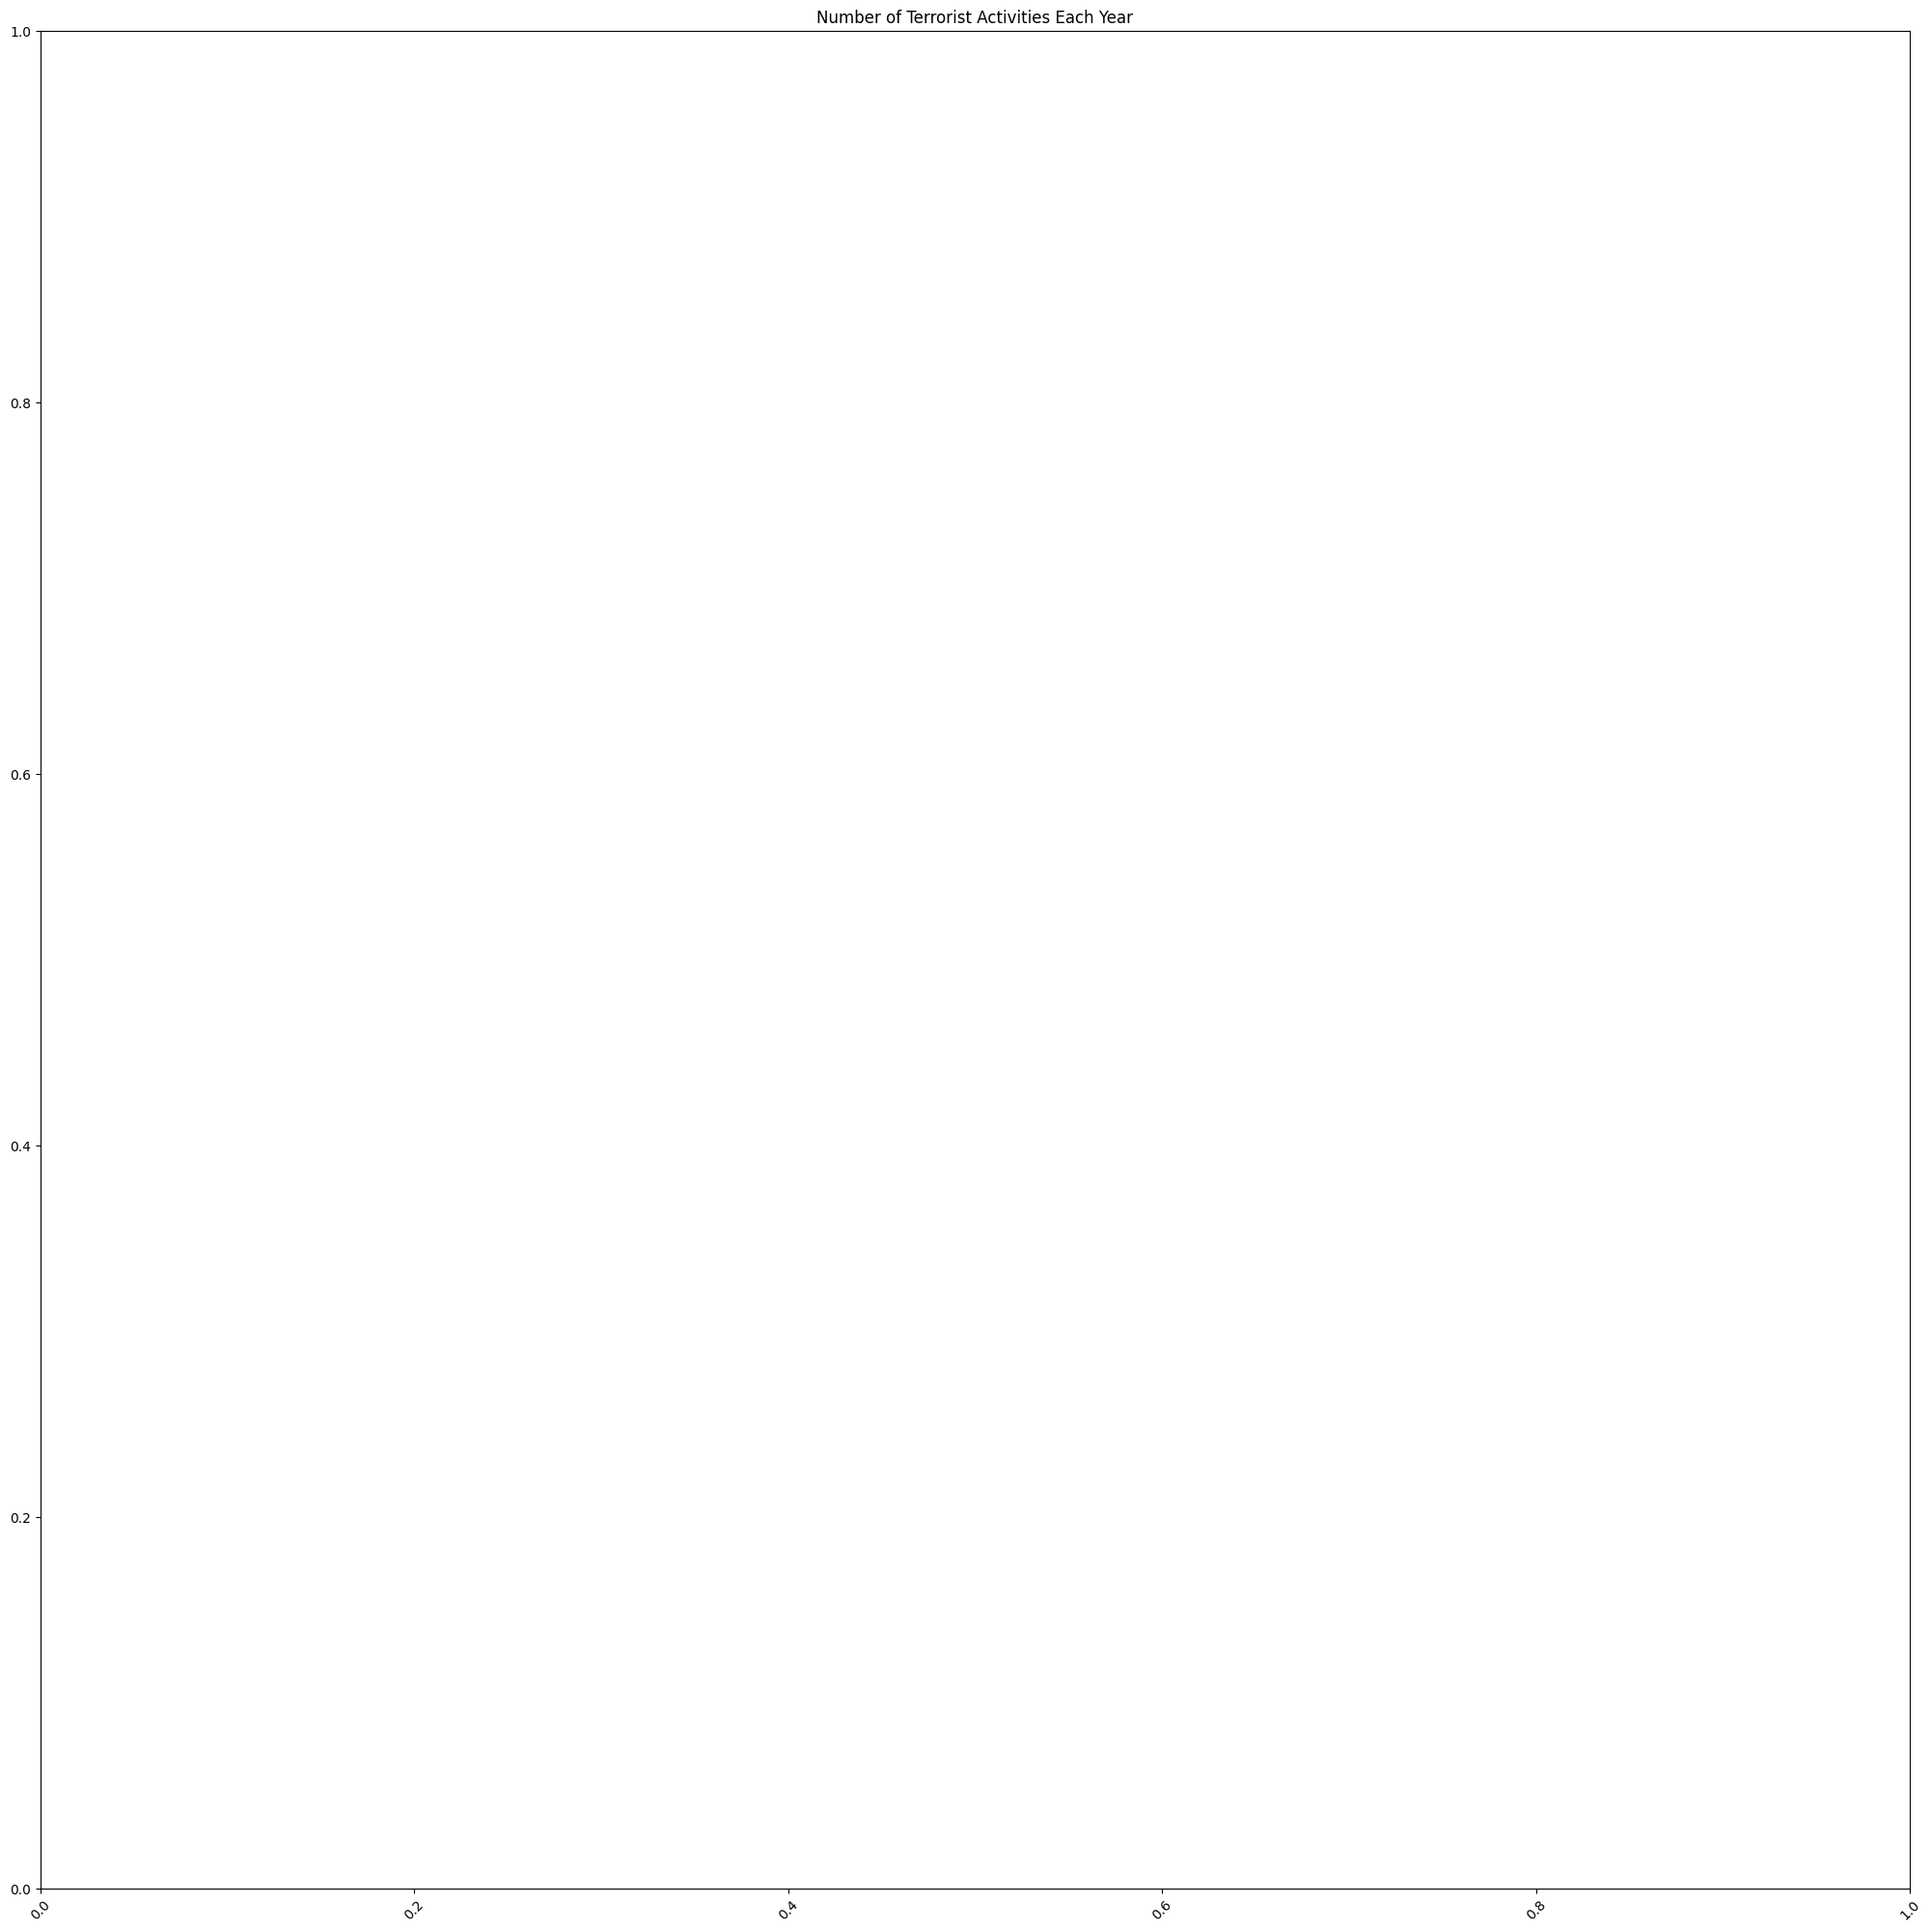

In [468]:
# plt.subplots(figsize=(15,6))
# sns.countplot('Year', data=dataset,palette = 'RdYlGn_r',edgecolor = sns.color_palette("TlOrBr",10))
plt.xticks(rotation = 45)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

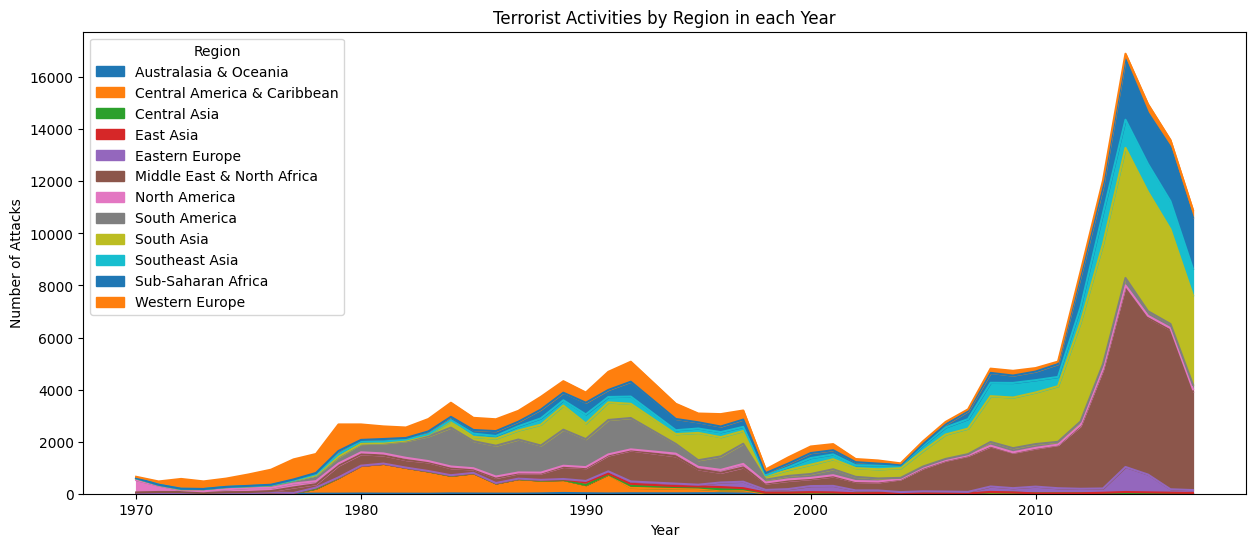

In [469]:
#Terrorist Activities by Region in each Year through Area Plot

pd.crosstab(dataset.Year, dataset.Region).plot(kind = 'area', figsize = (15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [470]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']

here i had used only 40 terro attacks as to keep the heatmap simple and easy to visualize

In [471]:
dataset1 = dataset.sort_values(by='casualities', ascending = False)[:40]

In [472]:
heat = dataset1.pivot_table(index='Country', columns = 'Year', values='casualities')
heat.fillna(0, inplace = True)

In [473]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [474]:
import plotly.offline as py 
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go 

colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']]

heatmap = go.Heatmap(z = heat.values, x = heat.columns, y = heat.index, colorscale=colorscale)

data = [heatmap]

layout = go.Layout(
title = 'Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks = '', nticks = 20),
    yaxis = dict(ticks = '')
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'heatmap', show_link = False)

In [475]:
dataset.Country.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

# Top countries affected by Terror Attacks

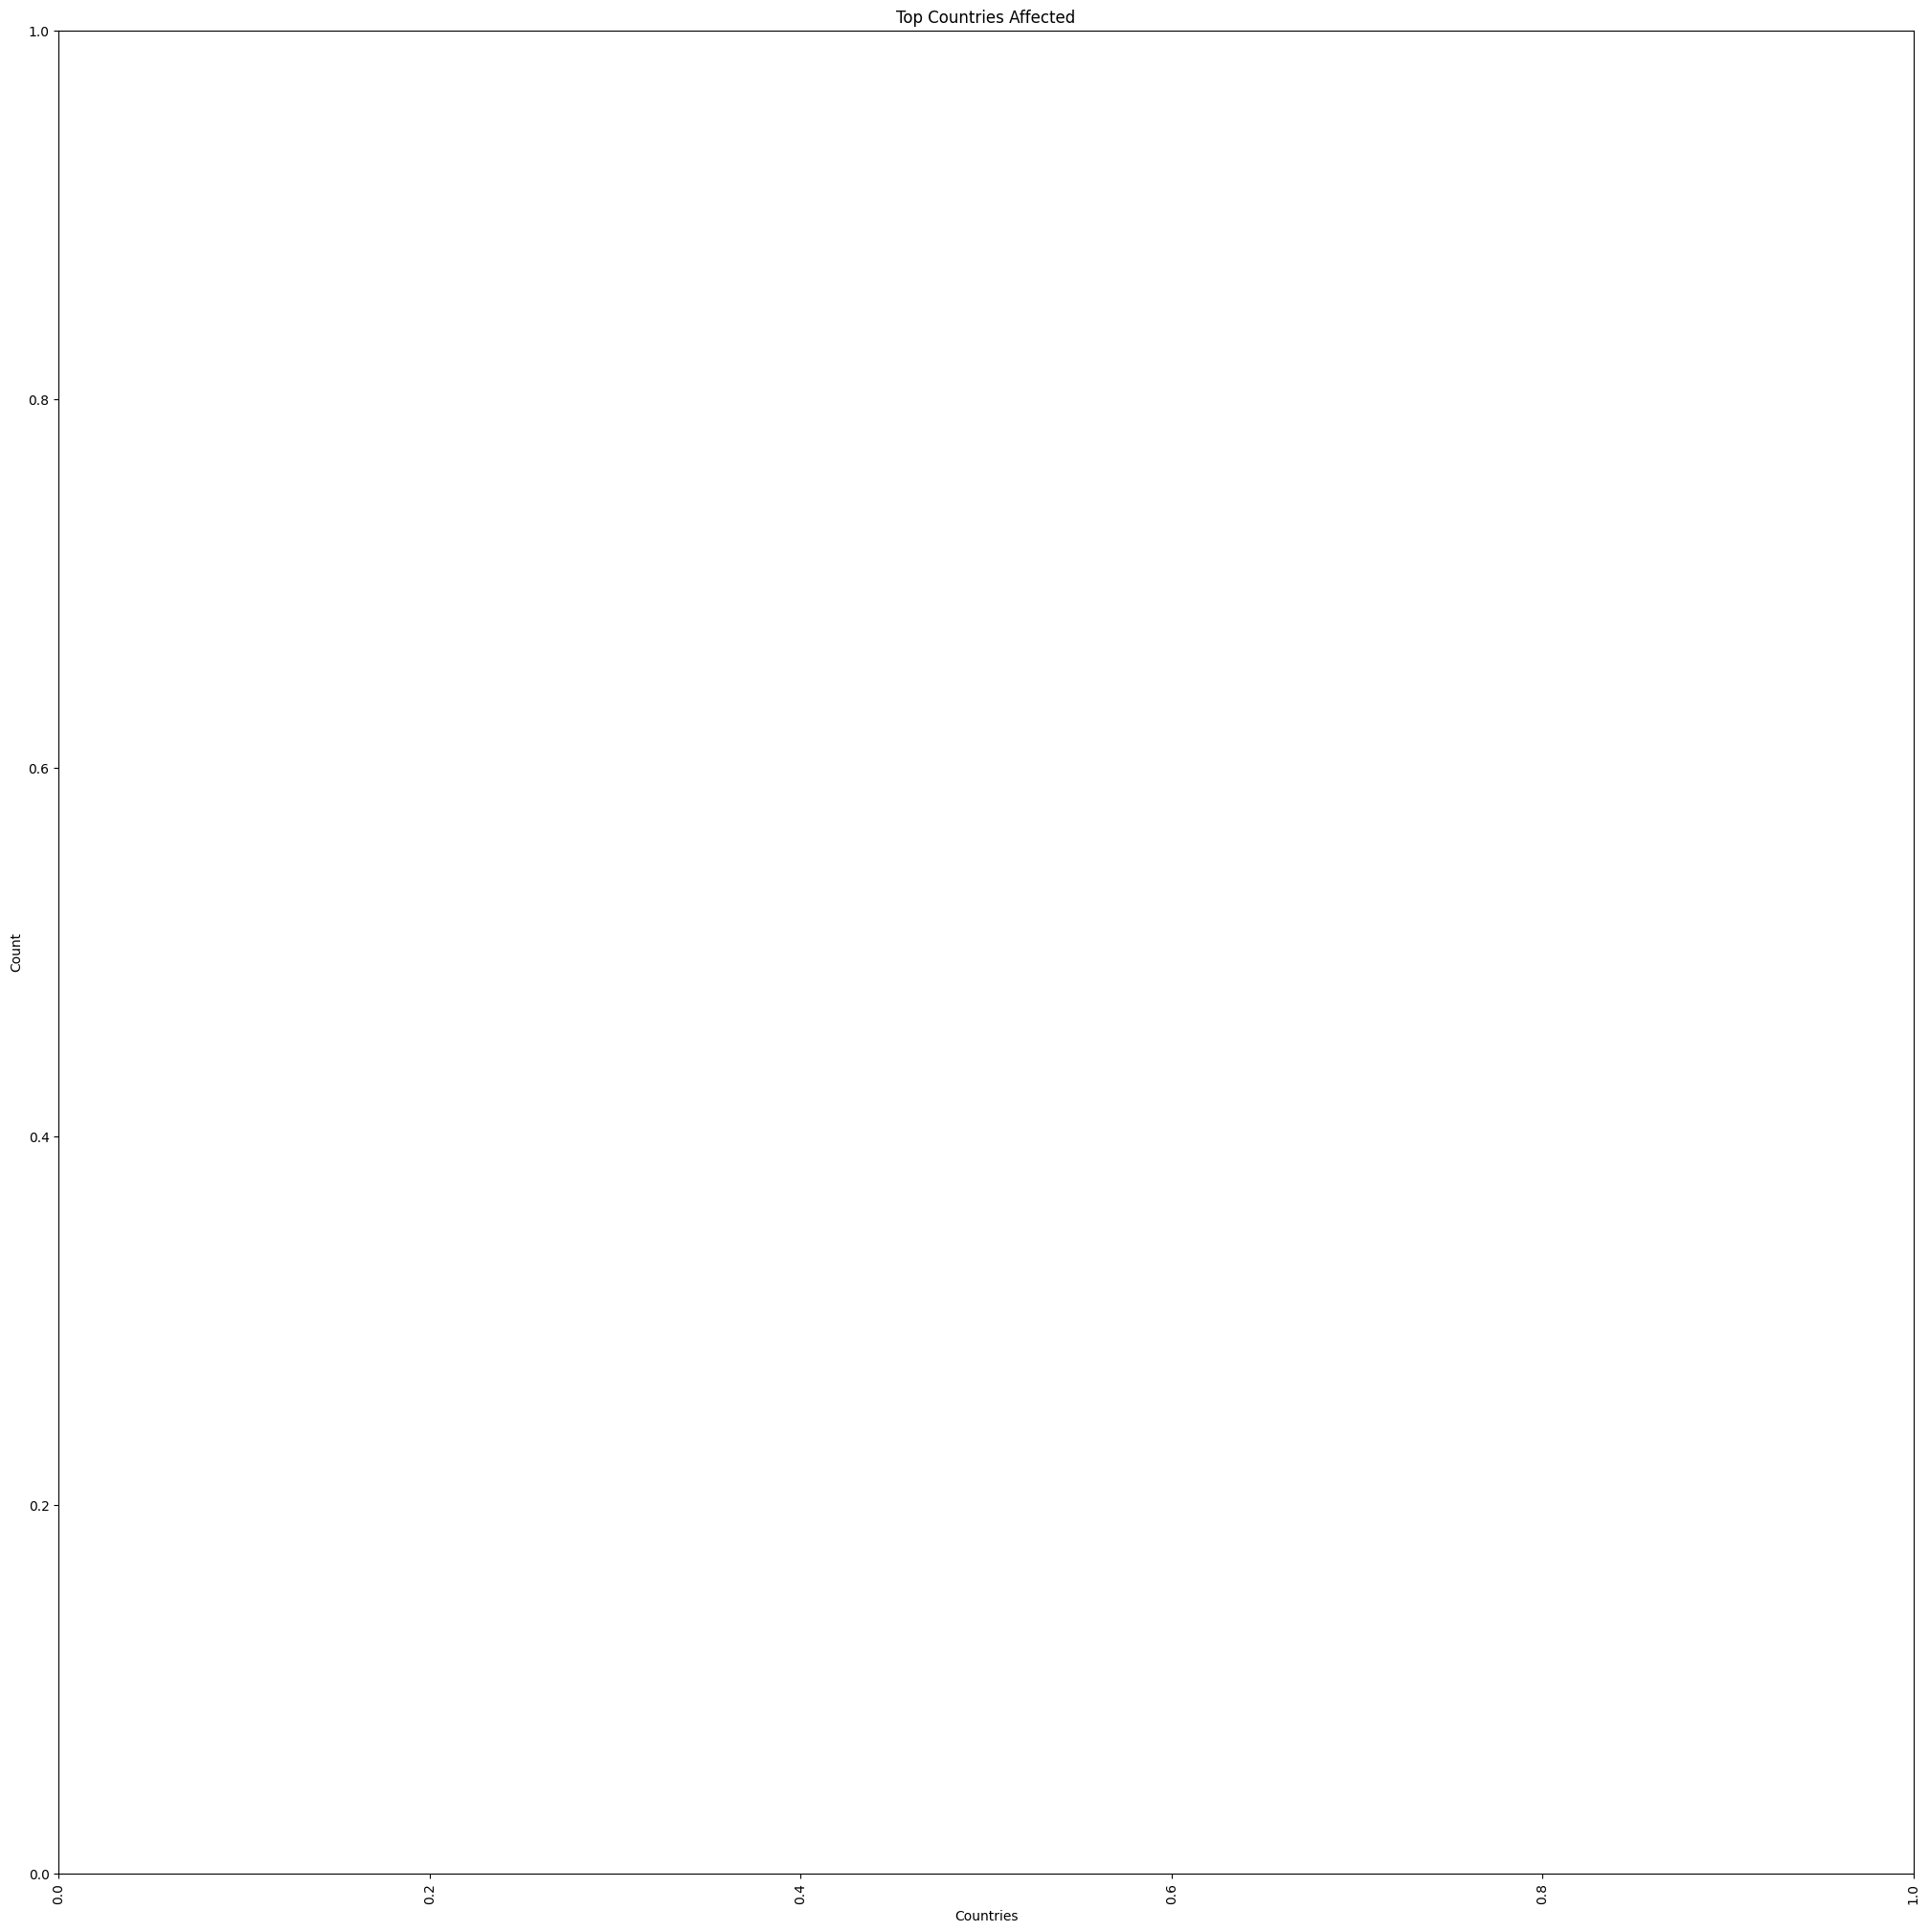

In [476]:
# plt.subplots(figsize(15,6))
# sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


# ANALYSIS ON CUSTOMIZED DATA

In [477]:
import folium 
from folium.plugins import MarkerCluster
filterYear = dataset['Year'] == 1970

In [435]:
#filter data 
filterData = dataset[filterYear]

#we are getting the required fields
reqFilterData = filterData.loc[:, 'City' : 'longitude']

#drop NaN values in latitude and longitude
reqFilterData = reqFilterData.dropna()

#reqFilterDataList 
reqFilterDataList = reqFilterData.values.tolist()


In [436]:
map = folium.Map(location = [0 , 30], tiles = 'CartoDB positron', zoom_start=2)

# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
# for point in range(0, len(reqFilterDataList)):
#     folium.Marker(locatin = [reqFilterDataList[point][1],reqFilterData[point][2]],
#                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

now i am going to check out which terrorist organizations have carried out their operations in each country. one value count give us the terrorist organizations that have carried out the most attacks. i had indexed from 1 as to neglate value of unknown.

In [437]:
dataset.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [438]:
test = dataset[dataset.Group.isin(['Shining Path (SL)', 'Taliban', 'ISIL'])]

In [440]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Turkmenistan'], dtype=object)

In [441]:
dataset_df_group = dataset.dropna(subset = ['latitude','longitude'])
dataset_df_group = dataset_df_group.drop_duplicates(subset = ['Country', 'Group'])
dataset_group = dataset.Group.value_counts()[1:8].index.tolist()
datset_df_group= dataset_df_group.loc[dataset_df_group.Group.isin(dataset_group)]
print(dataset_df_group.Group.unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [442]:
# map = folium.Map(location = [20,0], tiles = "CartoDB positron", zoom_start = 2)
# markerCluster = folium.plugins.MarkerCluster().add_to(map)
# for i in range(0, len(dataset_df_group)):
#     folium.Marker([dataset_df_group.iloc[i]['latitude'],
#                    dataset_df_group.iloc[i]['longitude']],
#                  popup = 'Group:{}<br>Country:{}'.format(dataset_df_group.iloc[i]['Group'],
#                                                         dataset_df_group.iloc[i]['Country'])).add_to(map)
# map
    

the above map looks untidy even through it can be zoomed in to view the Country. Hence in the next chart, i have used 
Folium's marker cluster these icons. this makes it visually pleasing and highly interactive.


In [443]:
m1 = folium.Map(location = [20,0], tiles="CartoDB positron", zoom_start = 2)
marker_cluster = MarkerCluster(

name='clustered icons',
overlay=True,
control=False,
icon_create_function = None
)

for i in range(0, len(dataset_df_group)):
    marker = folium.Marker([dataset_df_group.iloc[i]['latitude'],
                           dataset_df_group.iloc[i]['longitude']])
    popup = 'Group:{}<br>Country:{}'.format(dataset_df_group.iloc[i]['Group'],
                                           dataset_df_group.iloc[i]['Country'])
    
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
    marker_cluster.add_to(m1)
    folium.TileLayer('openstreetmap').add_to(m1)
#     folium.TileLayer('Mapbox Bright').add_to(m1)
    folium.TileLayer('cartodbdark_matter').add_to(m1)
    folium.TileLayer('stamentoner').add_to(m1)
    folium.LayerControl().add_to(m1)
    
    m1

In [444]:
dataset.head()

,Year,Month,Day,Country,state,City,Region,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [445]:
# Total number of people killed in terror attack 

killData = dataset.loc[:,'Killed']
print('Number of people killed by terro attack:', 
     int(sum(killData.dropna())))

Number of people killed by terro attack: 411868


In [446]:
# let's look at what types of attacks these deaths were made of.

attackData = dataset.loc[:,'AttackType']

typeKillData = pd.concat([attackData, killData], axis = 1)

In [447]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [448]:
typeKillFormatData = typeKillData.pivot_table(columns = 'AttackType', values = 'Killed', aggfunc = 'sum')

typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [449]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 152.0+ bytes


ValueError: x must be 1D

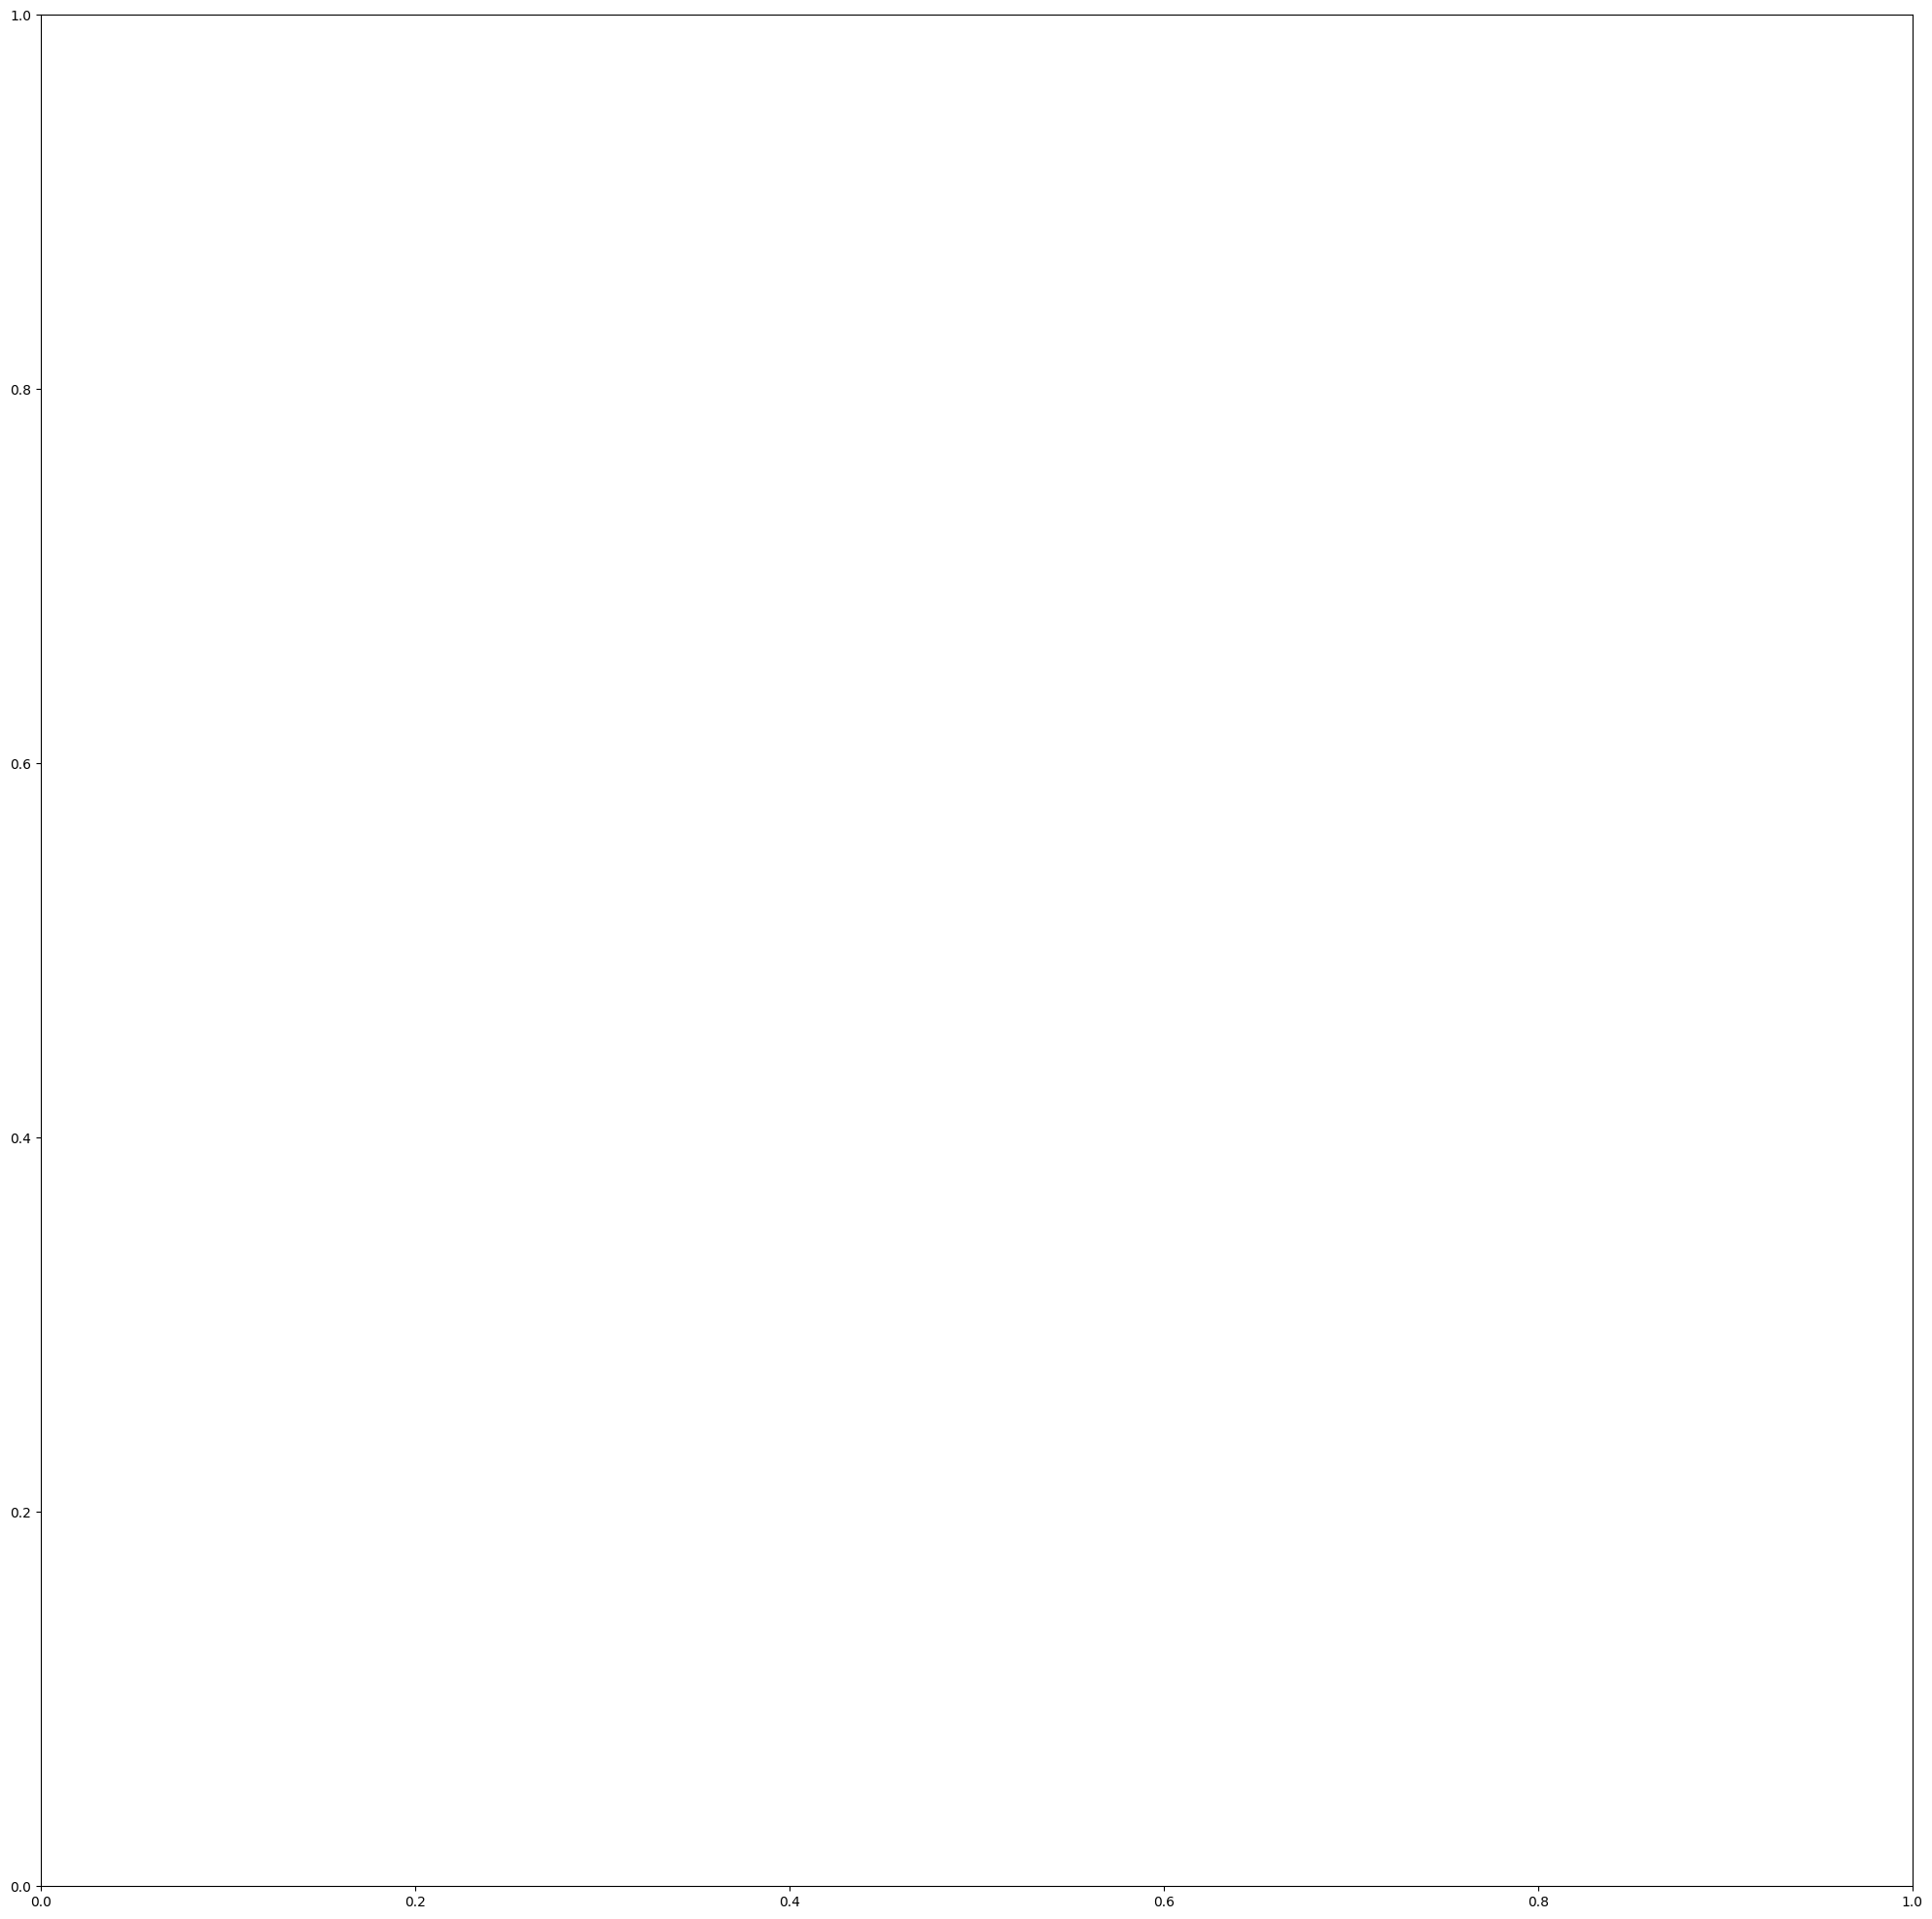

In [478]:
labels = typeKillFormatData.columns.tolist()

transpoze = typeKillFormatData.T
values = transpoze.values.tolist()
# fig, ax = plt.subplots(figsize=(20,20), subplot_kw = dict(aspect = 'equal'))

plt.pie(values, startangle = 90, autopct = '%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc = 'upper right', bbox_to_anchor = (1.3, 0.9), fontsize = 15)

plt.show()

Armed assault and bombing/exploion are seen to be cause of 77% of the deaths in thsese attacks. this rate is why these attacks
are used so many times in terrorist actions. This is how dangerous weapon and explosives are to the world

In [479]:
# number of Killed in Terrorist Attacks by countries 

countryData = dataset.loc[:,'Country']

countryKillData = pd.concat([countryData, killData], axis = 1)

In [480]:

countryKillFormatData = countryKillData.pivot_table(columns = 'Country', values='Killed', aggfunc = 'sum')

countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [481]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

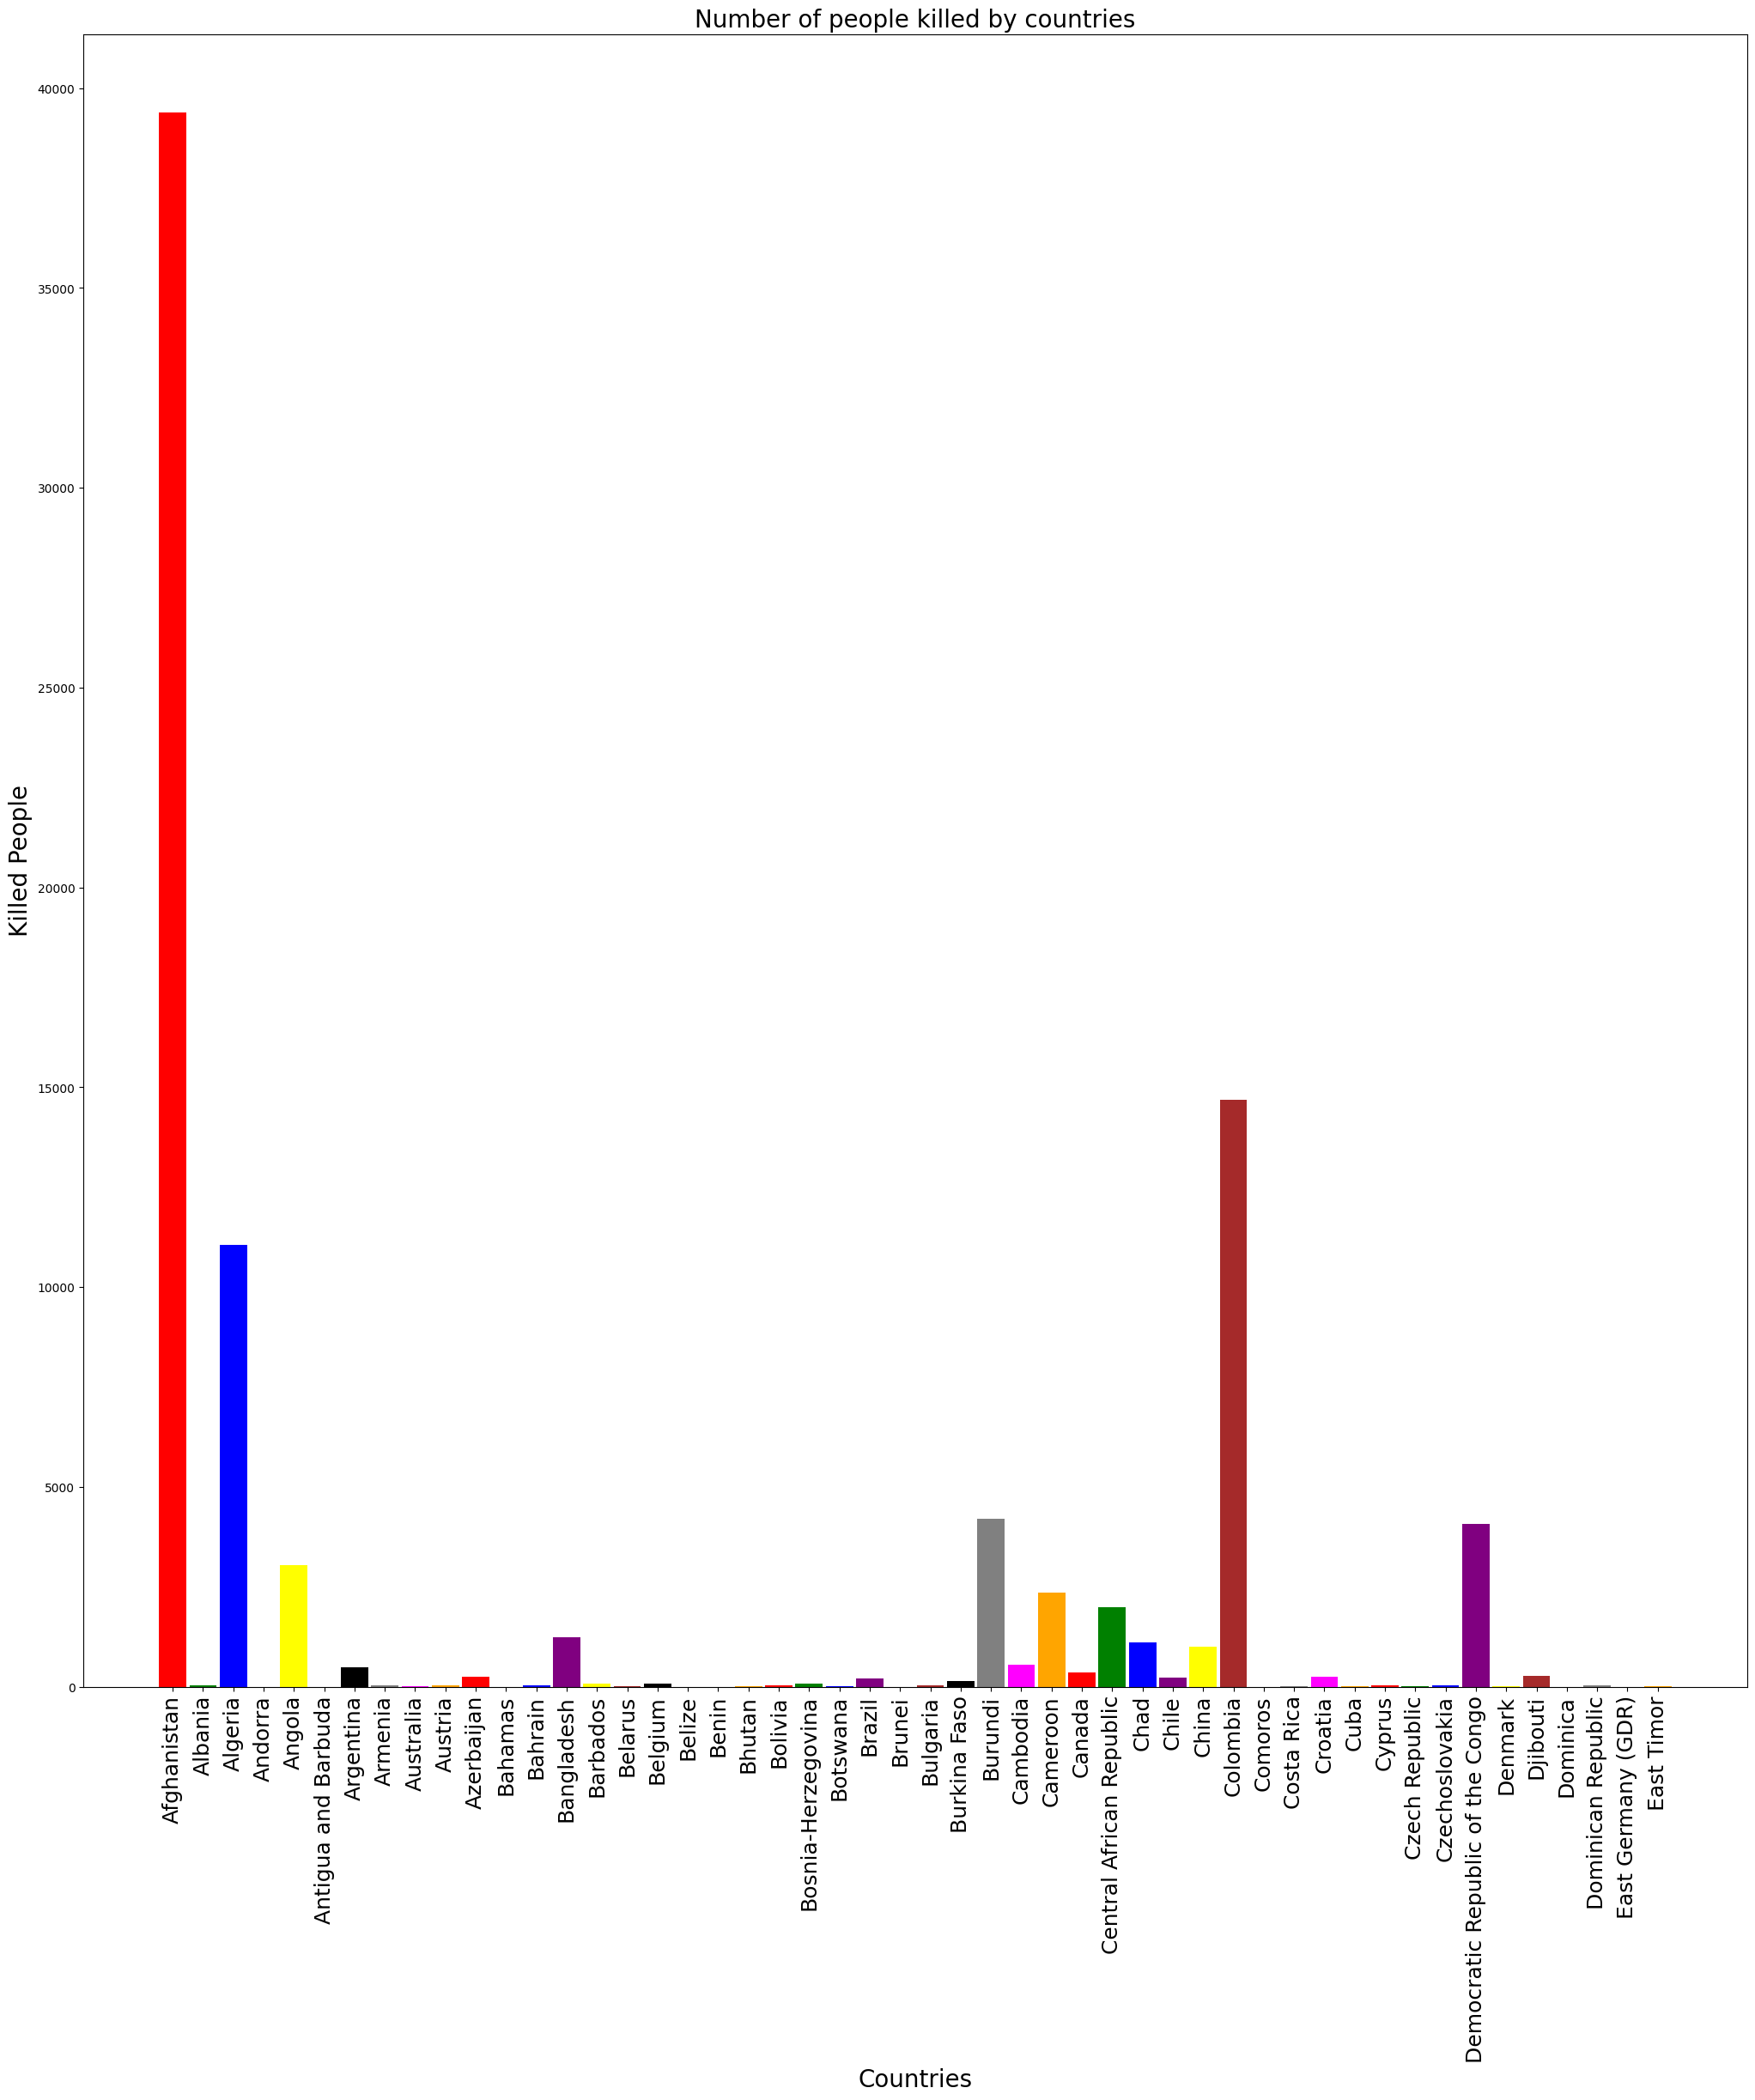

In [482]:
labels = countryKillFormatData.columns.tolist()
labels = labels [:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]

colors = ['red','green','blue','purple','yellow','brown','black','gray','magenta','orange']

# fig, ax = plt.subplots(1,1)
# ax.yaxis.grid(True)
fig_size= plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize = 18, rotation = 90)
plt.title('Number of people killed by countries', fontsize = 20)

plt.show()



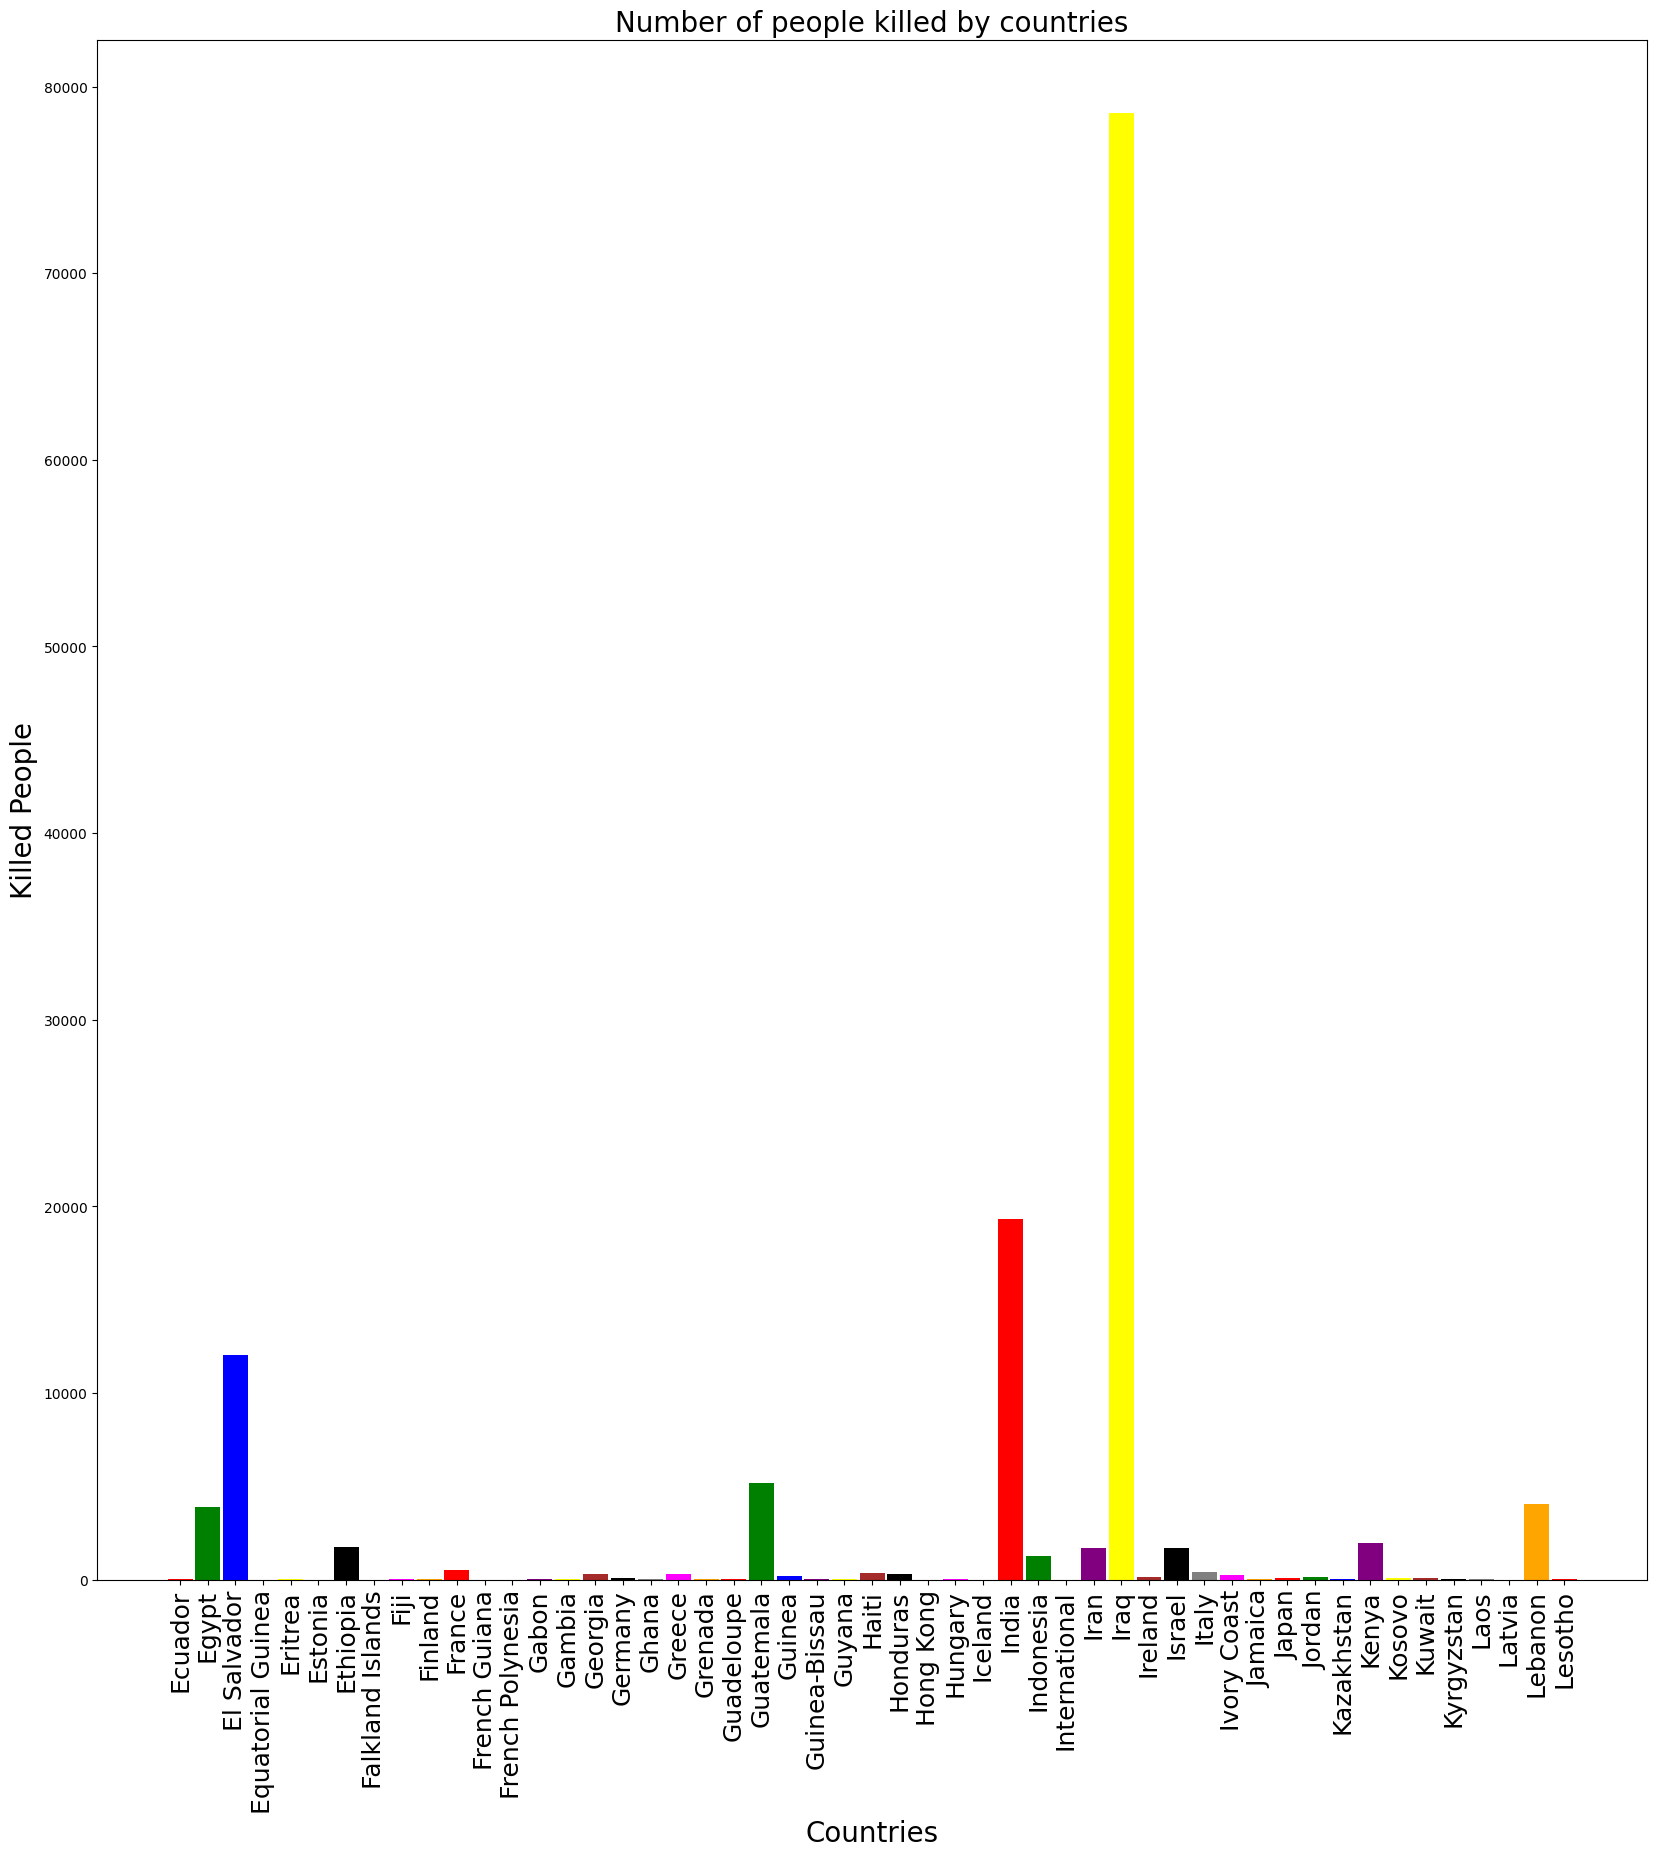

In [483]:
labels = countryKillFormatData.columns.tolist()
labels = labels [50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]

colors = ['red','green','blue','purple','yellow','brown','black','gray','magenta','orange']

# fig, ax = plt.subplots(1,1)
# ax.yaxis.grid(True)
fig_size= plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize = 18, rotation = 90)
plt.title('Number of people killed by countries', fontsize = 20)

plt.show()

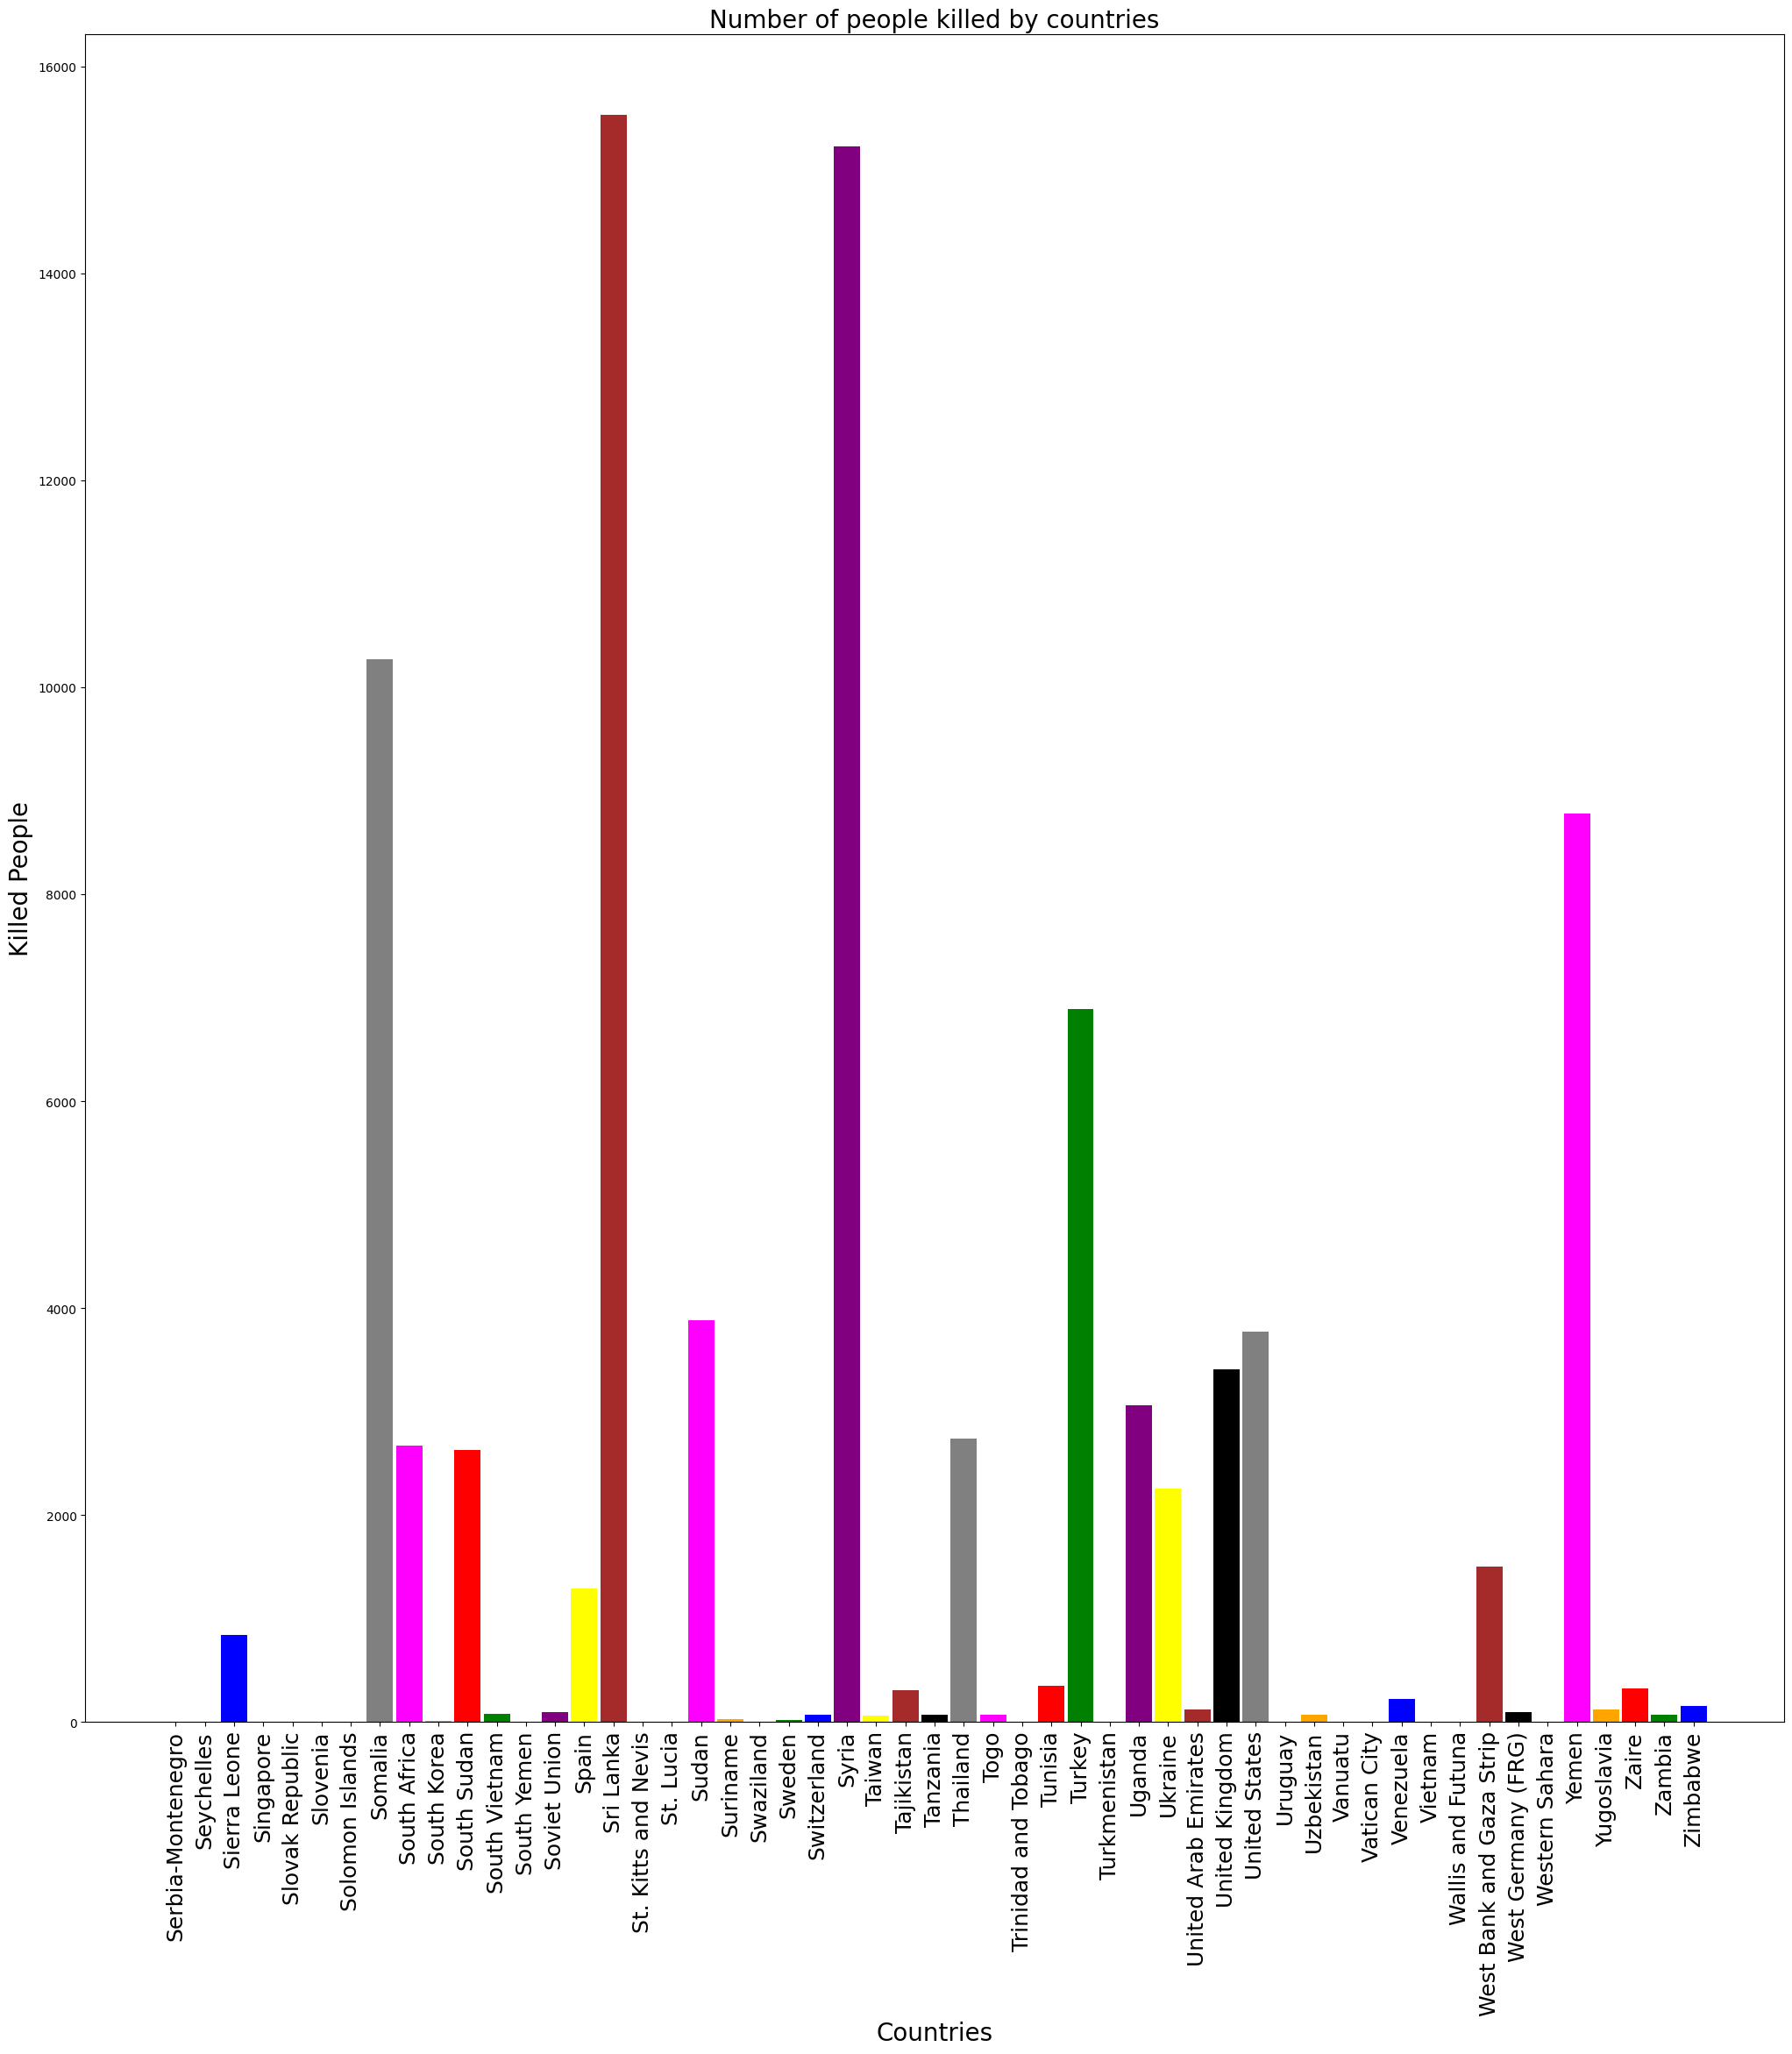

In [484]:
labels = countryKillFormatData.columns.tolist()
labels = labels [152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]

colors = ['red','green','blue','purple','yellow','brown','black','gray','magenta','orange']

# fig, ax = plt.subplots(1,1)
# ax.yaxis.grid(True)
fig_size= plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize = 18, rotation = 90)
plt.title('Number of people killed by countries', fontsize = 20)

plt.show()

# CONCLUSION

Terrorist acts in Middle East and northen africa have been seen to have
fatal consequences. The Middle East and North Africa are seen to be the 
places of serious terrorist attacks. in addition, even though there is a 
perception that muslims are supporters of terrorism, Muslims are the
people who are most damaged by terrorist attacks. 

if you look at the graphics, it appears that Irag, Afghanistan and Pakistan
are the most damaged countries. All of these countries are Muslim countries.